In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools

import statsmodels.api as sm
# % matplotlib inline



# Read csv data file

In [2]:
df= pd.read_csv('./tracking_michel.csv')

In [3]:
df.head()

,product,company_product_id,store_id,is_onsale,regular_price_ea,current_price_ea,edited_at,product_id,company_id
0,Apples - 3lb bag or individual,42305048,1499,0,0,1.38,2021-11-25,55107512,5
1,Apples - 3lb bag or individual,42305048,1499,0,0,1.38,2021-12-02,55107512,5
2,Apples - 3lb bag or individual,42305048,1499,0,0,1.38,2021-12-30,55107512,5
3,Apples - 3lb bag or individual,42305048,1499,0,0,1.38,2021-11-18,55107512,5
4,Apples - 3lb bag or individual,42305048,1499,0,0,1.38,2021-08-12,55107512,5


# Create column current_price base on regular_price_ea and current_price_ea

In [4]:
df['current_price'] = df.apply(
    lambda row: row['regular_price_ea']if row['regular_price_ea']>0 else row['current_price_ea'], axis=1)

# Group by Product and edited_at (collected_date)

In [5]:
group_by_df1 = df.groupby(['product','edited_at']).mean()

In [6]:
group_by_df1.head()

company_product_id  store_id  \
product                        edited_at                                  
Apples - 3lb bag or individual 2020-11-12          42305048.0    1499.0   
                               2020-11-19          42305048.0    1499.0   
                               2020-11-26          42305048.0    1499.0   
                               2020-12-03          42305048.0    1499.0   
                               2020-12-10          42305048.0    1499.0   

                                           is_onsale  regular_price_ea  \
product                        edited_at                                 
Apples - 3lb bag or individual 2020-11-12        0.0               0.0   
                               2020-11-19        0.0               0.0   
                               2020-11-26        0.0               0.0   
                               2020-12-03        0.0               0.0   
                               2020-12-10        0.0               0.0   

                                           current_price_ea  product_id  \
product                        edited_at                                  
Apples - 3lb bag or individual 2020-11-12              1.15  55107512.0   
                               2020-11-19              1.15  55107512.0   
                               2020-11-26              1.15  55107512.0   
                               2020-12-03              1.15  55107512.0   
                               2020-12-10              1.15  55107512.0   

                                           company_id  current_price  
product                        edited_at                              
Apples - 3lb bag or individual 2020-11-12         5.0           1.15  
                               2020-11-19         5.0           1.15  
                               2020-11-26         5.0           1.15  
                               2020-12-03         5.0           1.15  
                               2020-12-10         5.0           1.15

# Pivot table by edited_at (Collected_date)

In [7]:
pv = pd.pivot_table(group_by_df1,index=["edited_at"],
               values=["current_price"],
               aggfunc='mean',fill_value=np.nan,
               columns=["product"]
                      )

In [8]:
pv.head()

current_price                                     \
product    Apples - 3lb bag or individual Carrots Cauliflower Grape tomatoes   
edited_at                                                                      
2020-11-12                           1.15    2.00         NaN           7.99   
2020-11-19                           1.15    2.00        4.99           7.99   
2020-11-26                           1.15    2.49        4.99           7.99   
2020-12-03                           1.15    2.00        5.99           7.99   
2020-12-10                           1.15    2.99        5.99           7.99   

                                                          
product    Lettuce (leaf) Oranges - bagged or individual  
edited_at                                                 
2020-11-12           3.69                           5.00  
2020-11-19           3.69                           5.00  
2020-11-26           3.69                           5.00  
2020-12-03           3.69                           5.00  
2020-12-10            NaN                           4.99

# Fix Current Price missing value by BFILL

In [9]:
result = pv.bfill(axis='rows')
result.reset_index(inplace=True)
result.tail()

edited_at                  current_price                      \
product             Apples - 3lb bag or individual Carrots Cauliflower   
49       2021-11-11                           1.38    2.49        5.49   
50       2021-11-18                           1.38    2.49        4.99   
51       2021-11-25                           1.38    2.49        5.49   
52       2021-12-02                           1.38    2.49        4.99   
53       2021-12-30                           1.38    2.49        4.99   

                                                                      
product Grape tomatoes Lettuce (leaf) Oranges - bagged or individual  
49                8.99           2.69                           4.99  
50                8.99           2.99                           4.99  
51                8.99           3.49                           4.00  
52                8.99           3.49                           4.99  
53                6.00           2.99                           4.99

In [10]:
result.columns

MultiIndex([(    'edited_at',                               ''),
            ('current_price', 'Apples - 3lb bag or individual'),
            ('current_price',                        'Carrots'),
            ('current_price',                    'Cauliflower'),
            ('current_price',                 'Grape tomatoes'),
            ('current_price',                 'Lettuce (leaf)'),
            ('current_price', 'Oranges - bagged or individual')],
           names=[None, 'product'])

In [11]:
#rename columns
result.columns = ['Collected_Date','Apples','Carrots','Cauliflower','Tomatoes','Lettuce','Oranges']
result.columns

Index(['Collected_Date', 'Apples', 'Carrots', 'Cauliflower', 'Tomatoes',
       'Lettuce', 'Oranges'],
      dtype='object')

# Convert Collected_Date to Datetime

In [12]:
result['Collected_Date'] =  pd.to_datetime(result['Collected_Date'])

# Index time-serial data

In [13]:
result = result.set_index('Collected_Date')

# Create a mean column

In [14]:
result['Avg_Price'] = result[['Apples','Carrots','Cauliflower','Tomatoes','Lettuce','Oranges']].mean(axis=1) 

# Plot data

<AxesSubplot:xlabel='Collected_Date'>

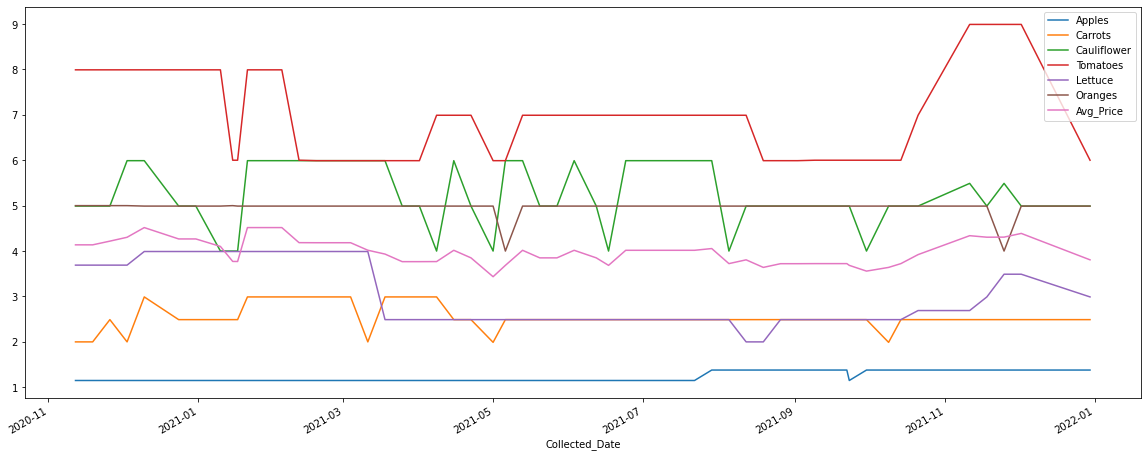

In [35]:
result.plot(figsize=(20, 8))

# Avg price data time-series visualization

In [43]:
# Averaging Daily Sales
avg_prices = result['Avg_Price'].resample('W').mean()

In [46]:
avg_prices = avg_prices.bfill(axis='rows')

<AxesSubplot:xlabel='Collected_Date'>

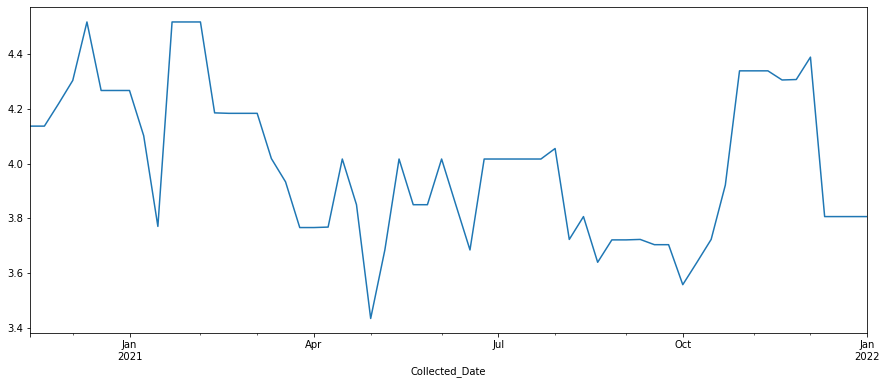

In [48]:
avg_prices.plot(figsize=(15, 6))

In [47]:
print(avg_prices)

Collected_Date
2020-11-15    4.136667
2020-11-22    4.136667
2020-11-29    4.218333
2020-12-06    4.303333
2020-12-13    4.516667
2020-12-20    4.266667
2020-12-27    4.266667
2021-01-03    4.266667
2021-01-10    4.101667
2021-01-17    3.770833
2021-01-24    4.516667
2021-01-31    4.516667
2021-02-07    4.516667
2021-02-14    4.185000
2021-02-21    4.183333
2021-02-28    4.183333
2021-03-07    4.183333
2021-03-14    4.018333
2021-03-21    3.933333
2021-03-28    3.766667
2021-04-04    3.766667
2021-04-11    3.768333
2021-04-18    4.016667
2021-04-25    3.850000
2021-05-02    3.435000
2021-05-09    3.685000
2021-05-16    4.016667
2021-05-23    3.850000
2021-05-30    3.850000
2021-06-06    4.016667
2021-06-13    3.850000
2021-06-20    3.685000
2021-06-27    4.016667
2021-07-04    4.016667
2021-07-11    4.016667
2021-07-18    4.016667
2021-07-25    4.016667
2021-08-01    4.055000
2021-08-08    3.723333
2021-08-15    3.806667
2021-08-22    3.640000
2021-08-29    3.721667
2021-09-05    3.721